In [0]:
import requests
import json
from collections import OrderedDict
import pandas as pd

# Data collection and preprocessing

In [0]:
parameters = {'code_commune':'51454', 'nature_mutation' : 'Vente', 'type_local' : 'Appartement'}

res = requests.get('http://api.cquest.org/dvf', 
                   params=parameters)

In [0]:
if res.ok:
    content = res.json()
else:
    print("______Bad response from server______")

In [68]:
df = pd.DataFrame(content['resultats'])
df

,articles_1,articles_2,articles_3,articles_4,articles_5,code_commune,code_departement,code_postal,code_service_ch,code_type_local,code_voie,commune,date_mutation,identifiant_local,lat,lon,lot_1,lot_2,lot_3,lot_4,lot_5,nature_culture,nature_culture_speciale,nature_mutation,nombre_lots,nombre_pieces_principales,numero_disposition,numero_plan,numero_voie,numero_volume,prefixe_section,reference_document,section,suffixe_numero,surface_lot_1,surface_lot_2,surface_lot_3,surface_lot_4,surface_lot_51,surface_relle_bati,surface_terrain,type_local,type_voie,valeur_fonciere,voie
0,None,None,None,None,None,51454,51,51100,None,2,3862,REIMS,2018-11-19,None,49.227727,4.003405,24,None,None,None,None,None,None,Vente,1,5,000001,51454000KT0180,6,None,None,None,KT,,NaN,NaN,NaN,NaN,NaN,113,NaN,Appartement,ALL,75000.00,DES GASCONS
1,None,None,None,None,None,51454,51,51100,None,2,8711,REIMS,2018-04-11,None,49.224469,4.016537,21,None,None,None,None,None,None,Vente,1,1,000001,51454000KR0027,11,None,None,None,KR,,30.30,NaN,NaN,NaN,NaN,30,NaN,Appartement,PL,52000.00,TOULOUSE LAUTREC
2,None,None,None,None,None,51454,51,51100,None,2,6772,REIMS,2018-12-26,None,49.226420,4.012221,38,82,None,None,None,None,None,Vente,2,4,000001,51454000KR0004,12,None,None,None,KR,,72.06,NaN,NaN,NaN,NaN,73,NaN,Appartement,ESP,90200.00,PAUL CEZANNE
3,None,None,None,None,None,51454,51,51100,None,2,6772,REIMS,2018-05-15,None,49.226420,4.012221,14,58,None,None,None,None,None,Vente,2,4,000001,51454000KR0004,12,None,None,None,KR,,72.10,NaN,NaN,NaN,NaN,73,NaN,Appartement,ESP,48000.00,PAUL CEZANNE
4,None,None,None,None,None,51454,51,51100,None,2,6772,REIMS,2018-12-27,None,49.226420,4.012221,34,78,None,None,None,None,None,Vente,2,4,000001,51454000KR0004,12,None,None,None,KR,,NaN,NaN,NaN,NaN,NaN,73,NaN,Appartement,ESP,63000.00,PAUL CEZANNE
5,None,None,None,None,None,51454,51,51100,None,2,6772,REIMS,2017-11-13,None,49.226420,4.012221,26,70,None,None,None,None,None,Vente,2,4,000001,51454000KR0004,12,None,None,None,KR,,72.16,NaN,NaN,NaN,NaN,73,NaN,Appartement,ESP,85000.00,PAUL CEZANNE
6,None,None,None,None,None,51454,51,51100,None,2,8711,REIMS,2018-05-07,None,49.224630,4.015865,46,56,None,None,None,None,None,Vente,2,1,000001,51454000KR0029,15,None,None,None,KR,,NaN,30.27,NaN,NaN,NaN,30,NaN,Appartement,PL,63000.00,TOULOUSE LAUTREC
7,None,None,None,None,None,51454,51,51100,None,2,8711,REIMS,2018-12-21,None,49.224630,4.015865,24,None,None,None,None,None,None,Vente,1,2,000001,51454000KR0029,13,None,None,None,KR,,50.40,NaN,NaN,NaN,NaN,51,NaN,Appartement,PL,65000.00,TOULOUSE LAUTREC
8,None,None,None,None,None,51454,51,51100,None,2,8711,REIMS,2018-10-05,None,49.224630,4.015865,43,51,None,None,None,None,None,Vente,2,1,000001,51454000KR0029,15,None,None,None,KR,,NaN,30.85,NaN,NaN,NaN,30,NaN,Appartement,PL,60000.00,TOULOUSE LAUTREC
9,None,None,None,None,None,51454,51,51100,None,2,8711,REIMS,2018-02-27,None,49.224810,4.015752,24,None,None,None,None,None,None,Vente,1,1,000001,51454000KR0030,17,None,None,None,KR,,NaN,NaN,NaN,NaN,NaN,30,NaN,Appartement,PL,52000.00,TOULOUSE LAUTREC


In [0]:
columns = ['date_mutation','nombre_lots','nombre_pieces_principales','surface_relle_bati',
           'valeur_fonciere','numero_plan', 'lat', 'lon']
df = df[columns]

We get rid of flats with a retail price of more than 1 million € or more than 200 sq meters, as these are considered as outliers for our study here (either database issues or very exceptionnal flats that don't represent the market)

In [72]:
df = df[df['valeur_fonciere']<1000000]
df = df[df['surface_relle_bati']<200]

print("We removed ", 11195 - len(df), 'items')

We removed  527 items


Let's create a new column in the dataframe with the sales' year

In [0]:
from datetime import datetime

df['date_mutation'] = [datetime.strptime(i, '%Y-%m-%d') for i in df['date_mutation']]

In [0]:
df['year'] = pd.Series([elem.year for elem in df['date_mutation']], index=df.index)

We will analyse in parallel the statistics at two scales: the whole city of Reims, and the center neighborhood of the city. We will also take a look at another neighborhood, "saint-remi", neer the center. We create three datasets accordingly.

In [0]:
center = "51454000IK"
sr = "51454000DM"
mask_center = [center in elem for elem in df['numero_plan']]
mask_sr = [sr in elem for elem in df['numero_plan']]

In [78]:
df_center = df[mask_center] 
df_sr = df[mask_sr]
df_all = df
print("All city is ", len(df_all), " flats, center neighborhood is ", len(df_center), " flats and saint-remi neighborhood is :",len(df_sr)," flats")

All city is  10668  flats, center neighborhood is  659  flats and saint-remi neighborhood is : 391  flats


# Data vizualisation

In [0]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dcc5d2860>,
      dtype=object)

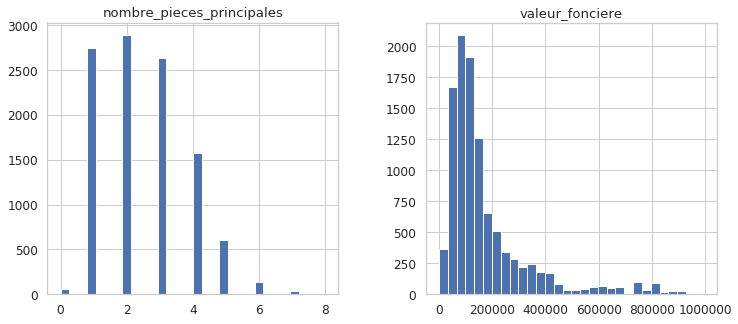

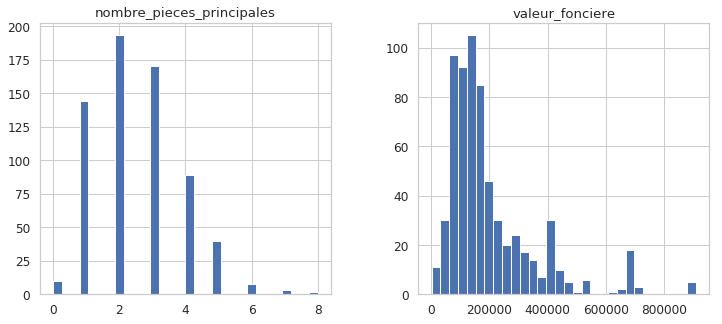

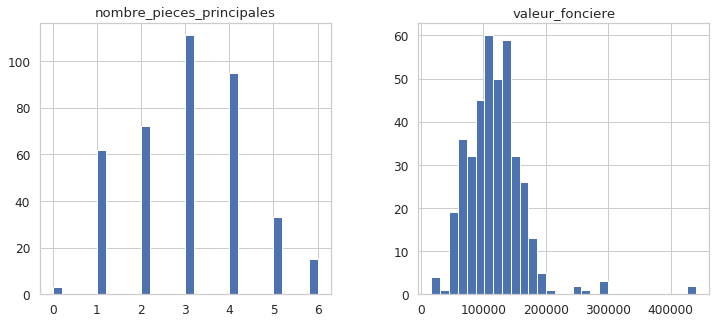

In [80]:
df_all[['nombre_pieces_principales','valeur_fonciere']].hist(bins=30, figsize=(12, 5), layout=(1, 2))
df_center[['nombre_pieces_principales','valeur_fonciere']].hist(bins=30, figsize=(12, 5), layout=(1, 2))
df_sr[['nombre_pieces_principales','valeur_fonciere']].hist(bins=30, figsize=(12, 5), layout=(1, 2))

As one could expect, the center of Reims contains flats with less rooms and of higher prices than the average of the city. The Saint-Remi neighborhood is quite different: the flats are bigger (with more rooms, easily 4, 5 or even 6 rooms), but the prices stop dramatically after 200k €, and are centered around 120k €.

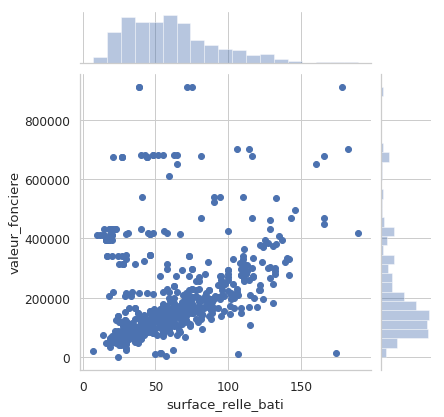

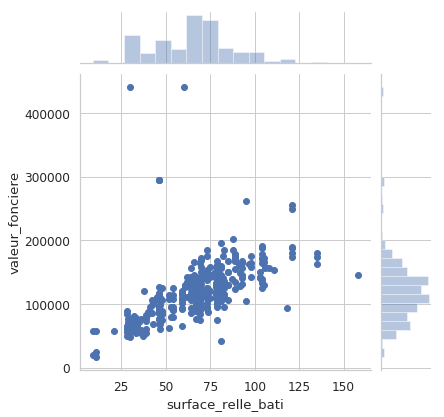

In [81]:
sns.jointplot(x=df_center['surface_relle_bati'], y=df_center['valeur_fonciere'])
sns.jointplot(x=df_sr['surface_relle_bati'], y=df_sr['valeur_fonciere'])

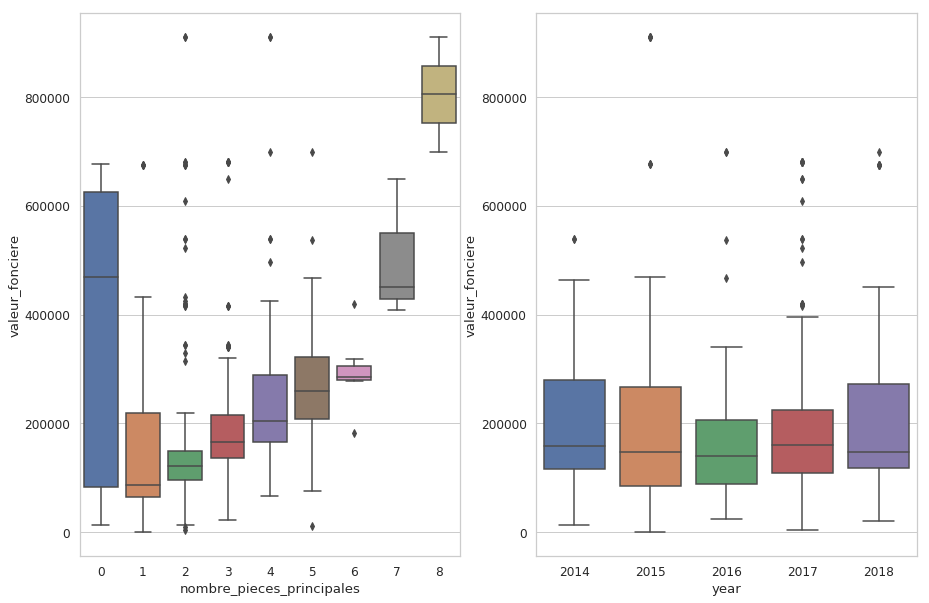

In [95]:
import matplotlib.pyplot as plt
categorical = ['nombre_pieces_principales', 'year']

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='valeur_fonciere', data=df_center, ax=subplot)

Let's now take a closer look to prices of 3 rooms flats

In [0]:
df_center_3 = df_center[df_center['nombre_pieces_principales'] == 3]
df_center_3 = df_center_3[df_center_3['valeur_fonciere'] < 400000]

df_all_3 = df_all[df_all['nombre_pieces_principales'] == 3]
df_all_3 = df_all_3[df_all_3['valeur_fonciere'] < 400000]

df_sr_3 = df_sr[df_sr['nombre_pieces_principales'] == 3]
df_sr_3 = df_sr_3[df_sr_3['valeur_fonciere'] < 400000]

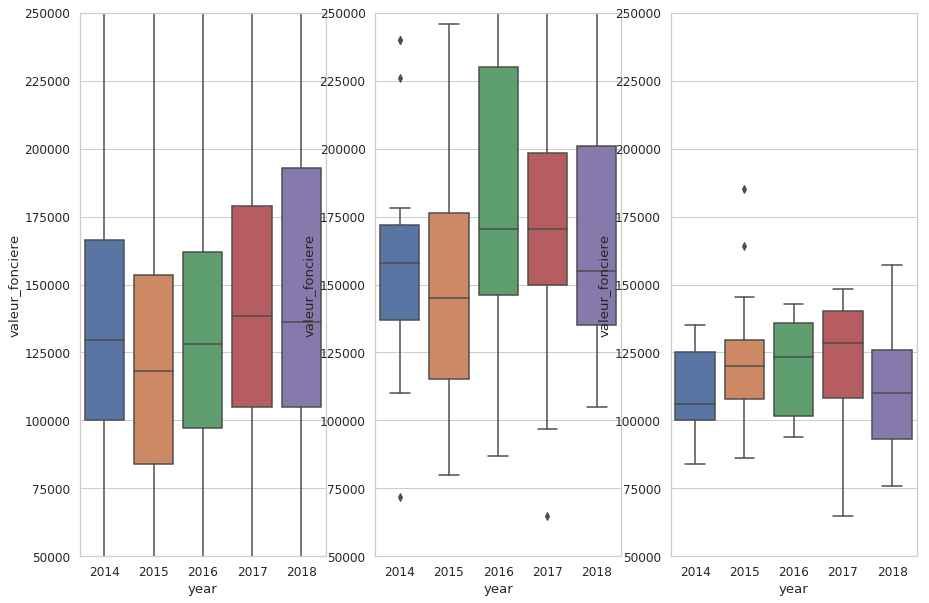

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.set_ylim(bottom=50000, top=250000)
ax2.set_ylim(bottom=50000, top=250000)
ax3.set_ylim(bottom=50000, top=250000)

sns.boxplot(x='year', y='valeur_fonciere', data=df_all_3, ax=ax1)
sns.boxplot(x='year', y='valeur_fonciere', data=df_center_3, ax=ax2)
sns.boxplot(x='year', y='valeur_fonciere', data=df_sr_3, ax=ax3)

In [0]:
df_center_4 = df_center[df_center['nombre_pieces_principales'] == 4]
df_center_4 = df_center_4[df_center_4['valeur_fonciere'] < 500000]

df_all_4 = df_all[df_all['nombre_pieces_principales'] == 4]
df_all_4 = df_all_4[df_all_4['valeur_fonciere'] < 500000]

df_sr_4 = df_sr[df_sr['nombre_pieces_principales'] == 4]
df_sr_4 = df_sr_4[df_sr_4['valeur_fonciere'] < 500000]

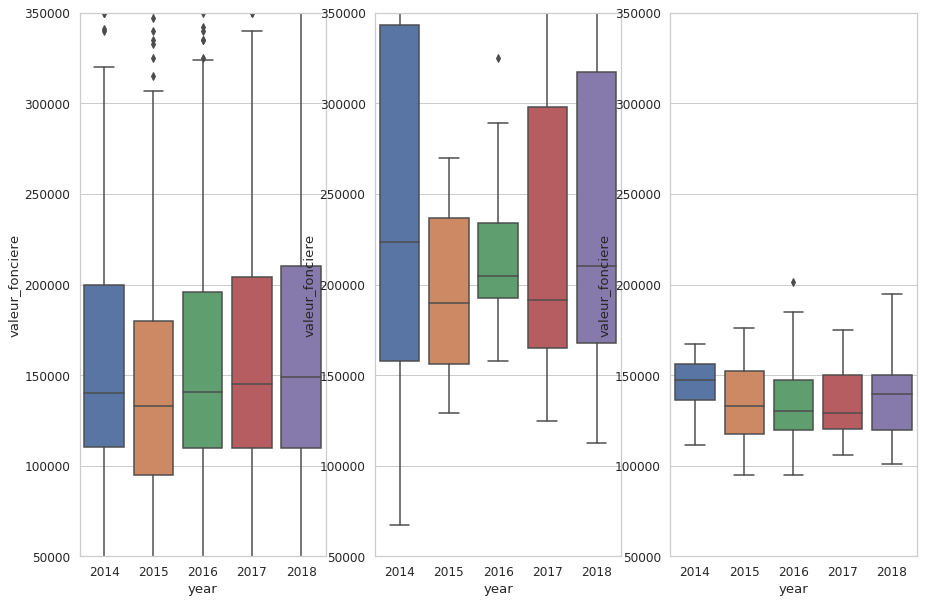

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.set_ylim(bottom=50000, top=350000)
ax2.set_ylim(bottom=50000, top=350000)
ax3.set_ylim(bottom=50000, top=350000)

sns.boxplot(x='year', y='valeur_fonciere', data=df_all_4, ax=ax1)
sns.boxplot(x='year', y='valeur_fonciere', data=df_center_4, ax=ax2)
sns.boxplot(x='year', y='valeur_fonciere', data=df_sr_4, ax=ax3)

Let's compute the price per sq meters, for 3 and 4 rooms flat together

In [0]:
df_all_34 = df_all[df_all['nombre_pieces_principales'] > 2]
df_all_34 = df_all_34[df_all_34['nombre_pieces_principales'] < 5]

df_center_34 = df_center[df_center['nombre_pieces_principales'] > 2]
df_center_34 = df_center_34[df_center_34['nombre_pieces_principales'] < 5]

df_sr_34 = df_sr[df_sr['nombre_pieces_principales'] > 2]
df_sr_34 = df_sr_34[df_sr_34['nombre_pieces_principales'] < 5]

In [0]:
df_sr_34['psq'] = pd.Series(df_sr_34['valeur_fonciere']/df_sr_34['surface_relle_bati'], index=df_sr_34.index)
df_all_34['psq'] = pd.Series(df_all_34['valeur_fonciere']/df_all_34['surface_relle_bati'], index=df_all_34.index)
df_center_34['psq'] = pd.Series(df_center_34['valeur_fonciere']/df_center_34['surface_relle_bati'], index=df_center_34.index)

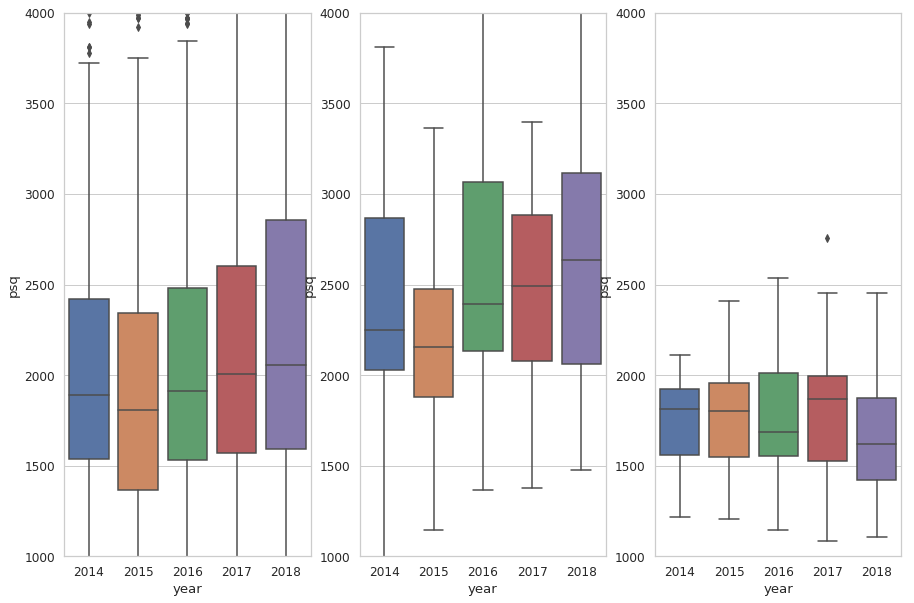

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.set_ylim(bottom=1000, top=4000)
ax2.set_ylim(bottom=1000, top=4000)
ax3.set_ylim(bottom=1000, top=4000)

sns.boxplot(x='year', y='psq', data=df_all_34, ax=ax1)
sns.boxplot(x='year', y='psq', data=df_center_34, ax=ax2)
sns.boxplot(x='year', y='psq', data=df_sr_34, ax=ax3)

In [123]:
df_all_34.describe()

,nombre_pieces_principales,surface_relle_bati,valeur_fonciere,lat,lon,year,psq
count,4207.000000,4207.000000,4207.000000,4137.000000,4137.000000,4207.00000,4207.000000
mean,3.373425,72.862848,178701.623615,49.254714,4.032444,2016.12812,2552.526752
std,0.483771,17.090135,141590.870125,0.014006,0.012794,1.39440,2294.737000
min,3.000000,20.000000,0.000000,49.210503,4.001036,2014.00000,0.000000
25%,3.000000,63.000000,104500.000000,49.247483,4.023117,2015.00000,1525.320513
50%,3.000000,71.000000,137500.000000,49.255585,4.031526,2016.00000,1929.729730
75%,4.000000,80.500000,198250.000000,49.263704,4.041602,2017.00000,2562.500000
max,4.000000,190.000000,980000.000000,49.291293,4.075137,2018.00000,22413.636364


In [0]:
desc_all = df_all_34.describe().drop(axis=1, labels=['nombre_pieces_principales','lat', 'lon', 'year'])
desc_center = df_center_34.describe().drop(axis=1, labels=['nombre_pieces_principales','lat', 'lon', 'year'])
desc_sr = df_sr_34.describe().drop(axis=1, labels=['nombre_pieces_principales','lat', 'lon', 'year'])

In [130]:
print(desc_all)
print(desc_center)
print(desc_sr)

       surface_relle_bati  valeur_fonciere           psq
count         4207.000000      4207.000000   4207.000000
mean            72.862848    178701.623615   2552.526752
std             17.090135    141590.870125   2294.737000
min             20.000000         0.000000      0.000000
25%             63.000000    104500.000000   1525.320513
50%             71.000000    137500.000000   1929.729730
75%             80.500000    198250.000000   2562.500000
max            190.000000    980000.000000  22413.636364
       surface_relle_bati  valeur_fonciere           psq
count          259.000000       259.000000    259.000000
mean            76.335907    216687.200772   3014.566391
std             21.127499    132232.910776   2300.058232
min             24.000000     23000.000000    370.967742
25%             63.000000    147500.000000   2034.108527
50%             73.000000    175000.000000   2373.873874
75%             88.000000    240000.000000   2890.805816
max            146.000000    91